In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [110]:
data = pd.read_csv('data/auto-dataset.csv')
data = data.drop(['name'], axis=1)
#data = data.drop(['displacement'], axis=1)
labels = data.columns.values
feats = data.columns[1:]

data['horsepower'] = data['horsepower'].map(lambda a: np.sqrt(a))
data['weight'] = data['weight'].map(lambda a: np.cbrt(a))
data['displacement'] = data['horsepower'].map(lambda a: np.cbrt(a))


X = data[feats]
y = data[data.columns[0]]
#print(data)
#print(feats.values)
print(X)
#print(y)

print(X)

     cylinders  displacement  horsepower     weight  acceleration  year  \
0            8      2.250733   11.401754  15.188727          12.0    70   
1            8      2.341966   12.845233  15.457044          11.5    70   
2            8      2.305058   12.247449  15.089831          11.0    70   
3            8      2.305058   12.247449  15.085438          12.0    70   
4            8      2.278704   11.832160  15.108838          10.5    70   
..         ...           ...         ...        ...           ...   ...   
387          4      2.100953    9.273618  14.077798          15.6    82   
388          4      1.931971    7.211103  12.866484          24.6    82   
389          4      2.092730    9.165151  13.190489          11.6    82   
390          4      2.071434    8.888194  13.794621          18.6    82   
391          4      2.084342    9.055385  13.959064          19.4    82   

     origin  
0         1  
1         1  
2         1  
3         1  
4         1  
..      ...  
3

In [111]:
# Plot the feature plots to observe the relationships between all the predictors

size = len(labels)
figure, axis = plt.subplots(size, size, figsize=(100, 100), dpi=80)
for i, featx in enumerate(labels):
    for j, featy in enumerate(labels):
        index = (i, j)
        plt.subplot2grid((size, size), index, rowspan = 1, colspan = 1)
        if i >= j:
            continue
        plt.scatter(data[featx], data[featy], label = 'data')
        plt.title(featx + ' vs ' + featy)
plt.show()

In [112]:
corr_matrix = data.corr().abs()
print(corr_matrix)


                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000   0.777618      0.813515    0.802311  0.841889   
cylinders     0.777618   1.000000      0.846638    0.849266  0.890974   
displacement  0.813515   0.846638      1.000000    0.997733  0.875424   
horsepower    0.802311   0.849266      0.997733    1.000000  0.870009   
weight        0.841889   0.890974      0.875424    0.870009  1.000000   
acceleration  0.423329   0.504683      0.698462    0.696702  0.407204   
year          0.580541   0.345647      0.401611    0.409083  0.295015   
origin        0.565209   0.568932      0.479729    0.471495  0.602124   

              acceleration      year    origin  
mpg               0.423329  0.580541  0.565209  
cylinders         0.504683  0.345647  0.568932  
displacement      0.698462  0.401611  0.479729  
horsepower        0.696702  0.409083  0.471495  
weight            0.407204  0.295015  0.602124  
acceleration      1.000000  0.290316  0.212746  

In [113]:
from sklearn.linear_model import LinearRegression

y = np.array(y)
for feat in feats: # skip the first feature, which is our y value
    linear_model = LinearRegression()
    x = np.array(X[feat])
    linear_model.fit(x.reshape(-1, 1), y)
    print(f"Score for mpg as a function of {feat}:", linear_model.score(x.reshape(-1, 1), y))

Score for mpg as a function of cylinders: 0.6046889889441246
Score for mpg as a function of displacement: 0.6618071525601101
Score for mpg as a function of horsepower: 0.6437035832706476
Score for mpg as a function of weight: 0.7087778772249608
Score for mpg as a function of acceleration: 0.1792070501562546
Score for mpg as a function of year: 0.3370278133096227
Score for mpg as a function of origin: 0.3194609386689675


In [120]:
combined_arrays = np.stack([np.array(X[feat]) for feat in feats], axis = 1)
y = np.array(y)
multiple_linear_model = LinearRegression()
multiple_linear_model.fit(combined_arrays, y)
mlm_score = multiple_linear_model.score(combined_arrays, y)
print("score using feats:")
print(feats.values)
print(mlm_score)
#params = multiple_linear_model.get_params()
#print(params)
coefs = multiple_linear_model.coef_
predictions = multiple_linear_model.predict(combined_arrays)
# print(predictions)

score using feats:
['cylinders' 'displacement' 'horsepower' 'weight' 'acceleration' 'year'
 'origin']
0.8621171257223471


1. score using all feats:
* ['cylinders' 'displacement' 'horsepower' 'weight' 'acceleration' 'year'
 'origin']
* 0.8214780764810599

2. score using some feats:
* ['cylinders' 'horsepower' 'weight' 'acceleration' 'year' 'origin']
* 0.81821964040881

3. score using transformed feats:
* ['cylinders' sqrt('displacement') sqrt('horsepower') sqrt('weight') 'acceleration' 'year'
 'origin']
* 0.8621171257223471

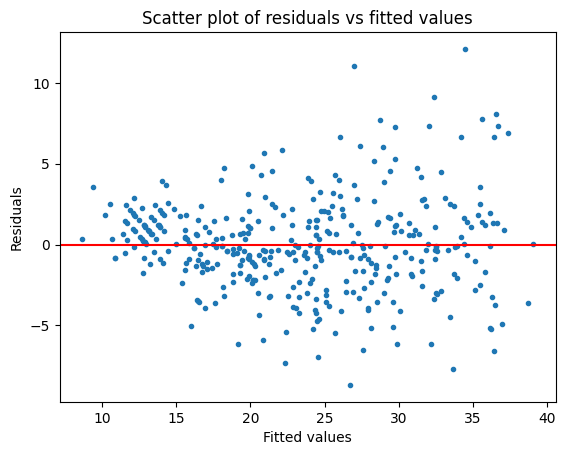

In [133]:
#Make a scatter plot of the residual vs the predictions of your linear regression model
#predictions = multiple_linear_model.predict(combined_arrays)
residuals = (y - predictions)
plt.figure()
plt.scatter(predictions, residuals, marker='.')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title("Scatter plot of residuals vs fitted values")
plt.axhline(y = np.nanmean(residuals), color = "red")